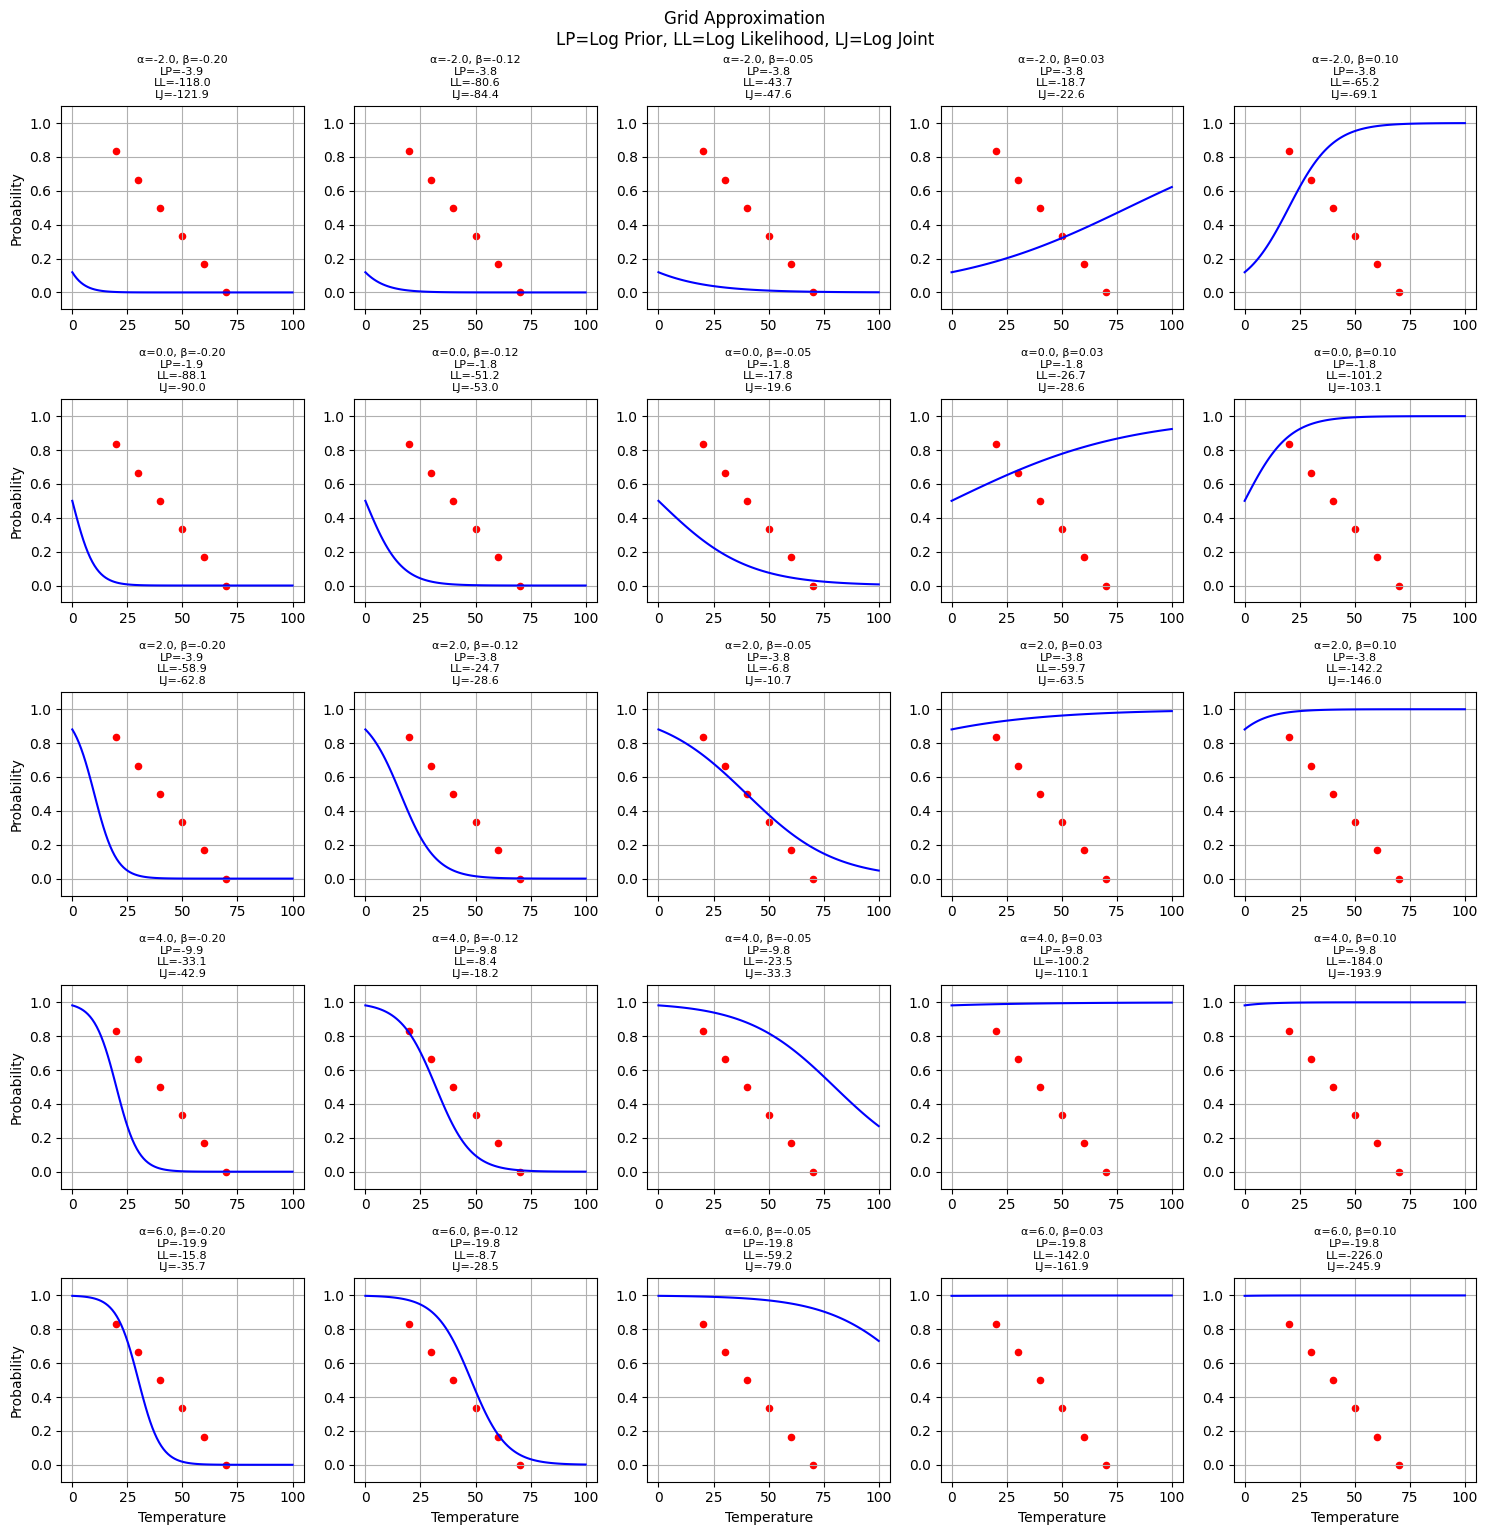


How to interpret the grid:
1. Each subplot shows the probability curve for different α (alpha) and β (beta) values
2. Red dots are the observed data points
3. Values shown for each combination:
   - LP: Log Prior (how likely are these parameters a priori)
   - LL: Log Likelihood (how well the curve fits the data)
   - LJ: Log Joint (sum of LP and LL)

Best fit will have:
- Curve passing close to red dots (high LL)
- Reasonable parameter values (high LP)
- High total score (high LJ)


: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom as binom_dist

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def log_npdf(x, m, v):
    return -(x-m)**2/(2*v) - 0.5*np.log(2*np.pi*v)

class LogisticRegression:
    def __init__(self, x, y, N, sigma2_alpha=1., sigma2_beta=1.):
        self.x = x
        self.y = y
        self.N = N
        self.sigma2_alpha = sigma2_alpha
        self.sigma2_beta = sigma2_beta
    
    def f(self, x, alpha, beta):
        return alpha + beta * x
    
    def theta(self, x, alpha, beta):
        z = self.f(x, alpha, beta)
        return sigmoid(z)
    
    def log_prior(self, alpha, beta):
        return (log_npdf(alpha, 0, self.sigma2_alpha) + 
                log_npdf(beta, 0, self.sigma2_beta))
    
    def log_likelihood(self, alpha, beta):
        theta = self.theta(self.x, alpha, beta)
        loglik = np.sum(binom_dist.logpmf(self.y, self.N, theta))
        return loglik
    
    def log_joint(self, alpha, beta):
        return self.log_prior(alpha, beta) + self.log_likelihood(alpha, beta)

# Create example data
x = np.array([20, 30, 40, 50, 60, 70])  # Temperatures
y = np.array([5, 4, 3, 2, 1, 0])        # Failed O-rings
N = 6  # Total O-rings per observation

# Initialize model
model = LogisticRegression(x, y, N)

# Create grid of alpha and beta values
alpha_vals = np.linspace(-2, 6, 5)
beta_vals = np.linspace(-0.2, 0.1, 5)

# Create figure
plt.figure(figsize=(15, 15))

# Plot grid
for i, alpha in enumerate(alpha_vals):
    for j, beta in enumerate(beta_vals):
        # Calculate values
        log_prior = model.log_prior(alpha, beta)
        log_likelihood = model.log_likelihood(alpha, beta)
        log_joint = model.log_joint(alpha, beta)
        
        # Create subplot
        plt.subplot(5, 5, i*5 + j + 1)
        
        # Plot temperature vs probability
        temp_range = np.linspace(0, 100, 100)
        probs = model.theta(temp_range, alpha, beta)
        plt.plot(temp_range, probs, 'b-', label='Probability')
        plt.scatter(x, y/N, color='red', s=20, label='Data' if i==0 and j==0 else "")
        
        # Add text with values
        plt.title(f'α={alpha:.1f}, β={beta:.2f}\nLP={log_prior:.1f}\nLL={log_likelihood:.1f}\nLJ={log_joint:.1f}', 
                 fontsize=8)
        
        plt.grid(True)
        if i == len(alpha_vals)-1:
            plt.xlabel('Temperature')
        if j == 0:
            plt.ylabel('Probability')
        plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.suptitle('Grid Approximation\nLP=Log Prior, LL=Log Likelihood, LJ=Log Joint', y=1.02)
plt.show()

# Print explanation of what to look for
print("\nHow to interpret the grid:")
print("1. Each subplot shows the probability curve for different α (alpha) and β (beta) values")
print("2. Red dots are the observed data points")
print("3. Values shown for each combination:")
print("   - LP: Log Prior (how likely are these parameters a priori)")
print("   - LL: Log Likelihood (how well the curve fits the data)")
print("   - LJ: Log Joint (sum of LP and LL)")
print("\nBest fit will have:")
print("- Curve passing close to red dots (high LL)")
print("- Reasonable parameter values (high LP)")
print("- High total score (high LJ)")